# Handling Outliers by Capping Method Part 2

In [2]:
# Importing importtant libraries 
import pandas as pd
import numpy as np

In [3]:
# importing the iris dataset for this project 
from sklearn.datasets import load_iris

In [4]:
# Storing the iris dataset as a function so that we can access its attributes and methods while creating a DataFrame from it
iris = load_iris()

In [5]:
# Displaying the keys of the iris dataset, which represent the main components of the dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# Creating a DataFrame from the iris dataset using its 'data' key for values and 'feature_names' key for column labels
# The 'keys()' method helps identify these keys ('data' and 'feature_names') to correctly structure the DataFrame
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
# Calculating quartiles for the 'sepal width (cm)' column:
# q1: First quartile (25th percentile) gives the value below which 25% of the data falls.
# q2: Second quartile (50th percentile or median) gives the middle value of the data.
# q3: Third quartile (75th percentile) gives the value below which 75% of the data falls.

q1 = df_iris["sepal width (cm)"].quantile(0.25)
q2 = df_iris["sepal width (cm)"].quantile(0.5)
q3 = df_iris["sepal width (cm)"].quantile(0.75)

In [9]:
# Calculating the lower and upper fences to identify outliers in the 'sepal width (cm)' column:
# lower_fence: Values below this threshold are considered lower outliers.
# higher_fence: Values above this threshold are considered upper outliers.
# These thresholds are determined using the interquartile range (IQR) formula: 
# IQR = q3 - q1, and fences are calculated as:
# lower_fence = q1 - 1.5 * IQR
# higher_fence = q3 + 1.5 * IQR


lower_fence = q1 - 1.5*(q3-q1)
higher_fence = q3 + 1.5*(q3-q1)

In [10]:
# Adjusting the values in the 'sepal width (cm)' column based on the calculated fences:
# - If a value is less than or equal to the lower_fence, it is replaced with the lower_fence.
# - If a value is greater than or equal to the higher_fence, it is replaced with the higher_fence.
# - Otherwise, the original value is retained.
# The modified values are stored in the list 'Number_mod'.


Number_mod = []
for x in df_iris["sepal width (cm)"]:
    if x <= lower_fence:
        x = lower_fence
        Number_mod.append(x)
    elif x >= higher_fence:
        x = higher_fence
        Number_mod.append(x)
    else:
        x = x
        Number_mod.append(x)
print(Number_mod)

[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.05, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.05, 4.05, 3.1, 3.2, 3.5, 3.6, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2.05, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0]


In [11]:
df_iris["NumberMod"] = Number_mod

In [12]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),NumberMod
0,5.1,3.5,1.4,0.2,3.5
1,4.9,3.0,1.4,0.2,3.0
2,4.7,3.2,1.3,0.2,3.2
3,4.6,3.1,1.5,0.2,3.1
4,5.0,3.6,1.4,0.2,3.6
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3.0
146,6.3,2.5,5.0,1.9,2.5
147,6.5,3.0,5.2,2.0,3.0
148,6.2,3.4,5.4,2.3,3.4


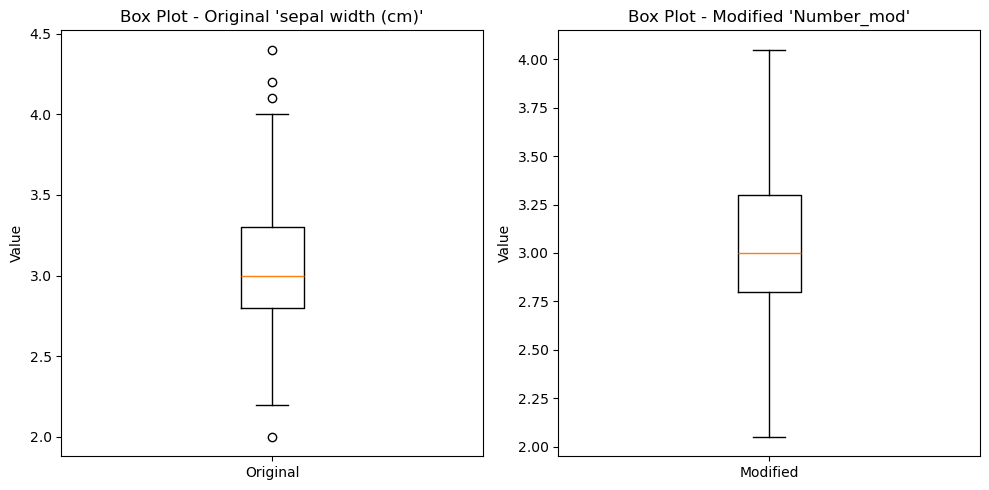

In [26]:
import matplotlib.pyplot as plt

# Plotting box plot for the original 'sepal width (cm)' feature
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df_iris["sepal width (cm)"])
plt.title("Box Plot - Original 'sepal width (cm)'")
plt.ylabel("Value")
plt.xticks([1], ['Original'])

# Plotting box plot for the modified 'Number_mod' feature
plt.subplot(1, 2, 2)
plt.boxplot(Number_mod)
plt.title("Box Plot - Modified 'Number_mod'")
plt.ylabel("Value")
plt.xticks([1], ['Modified'])

# Display both plots
plt.tight_layout()
plt.show()
